# 1. Imports, configs e constantes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

pd.set_option("display.max_columns", 100)
sns.set(style="whitegrid")

# Nomes das colunas importantes
TARGET_COL = "y"
ID_COL = "id"
TIME_COL = "safra"

# 2. Ler a base bruta

In [33]:
df = pd.read_csv(r'C:\Users\Enrico\OneDrive\Documentos\Python\credit_scoring_challenge\data\raw\base_modelo.csv')

df.shape

(10738, 81)

# 3. Definir as features

In [6]:
# Colunas que NÃO quero usar como preditoras
cols_to_drop = [TARGET_COL]  # sempre tira a target

# Se existir coluna de id, tira também
if ID_COL in df.columns:
    cols_to_drop.append(ID_COL)

# Se quiser tirar safra das features (geralmente sim), tira também
if TIME_COL in df.columns:
    cols_to_drop.append(TIME_COL)

# As features são todas as colunas menos as que estão em cols_to_drop
feature_cols = [col for col in df.columns if col not in cols_to_drop]

len(feature_cols)

78

# 4. Análise do target

In [ ]:
# Contagem absoluta
df[TARGET_COL].value_counts()

y
0    7610
1    3128
Name: count, dtype: int64

In [13]:
# Proporção de cada classe
target_dist = df[TARGET_COL].value_counts(normalize=True).rename("proportion")
target_dist

y
0    0.708698
1    0.291302
Name: proportion, dtype: float64

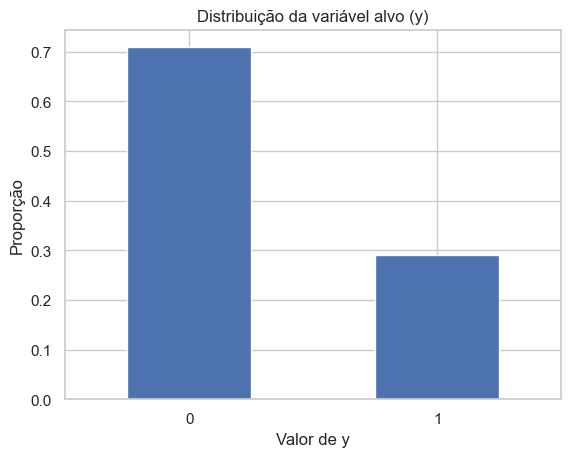

In [14]:
# Gráfico de barras da distribuição de y
ax = target_dist.plot(kind="bar")
ax.set_title("Distribuição da variável alvo (y)")
ax.set_ylabel("Proporção")
ax.set_xlabel("Valor de y")
plt.xticks(rotation=0)
plt.show()

In [15]:
# Visão geral das safras disponíveis
df[TIME_COL].value_counts().sort_index()

safra
201401    854
201402    898
201403    873
201404    955
201405    972
201406    902
201407    968
201408    912
201409    877
201410    933
201411    808
201412    786
Name: count, dtype: int64

In [16]:
# Taxa de default (média de y) e quantidade de observações por safra
safra_default = (
    df.groupby(TIME_COL)[TARGET_COL]
      .agg(["mean", "count"])
      .rename(columns={"mean": "taxa_default", "count": "qtde"})
      .sort_index()
)

safra_default

,taxa_default,qtde
safra,,
201401,0.346604,854
201402,0.312918,898
201403,0.253150,873
201404,0.257592,955
201405,0.252058,972
201406,0.263858,902
201407,0.277893,968
201408,0.281798,912
201409,0.299886,877


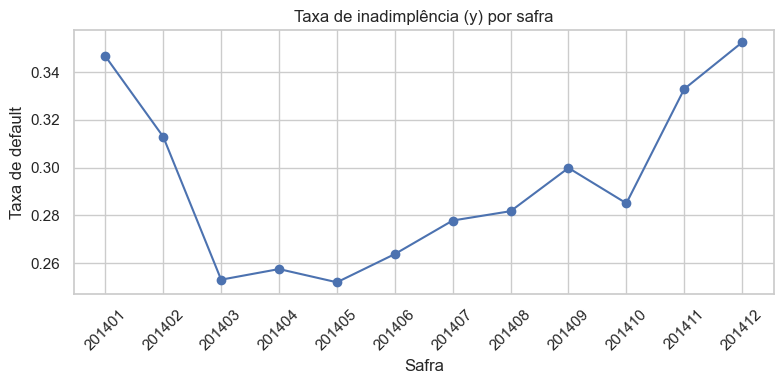

In [17]:
# Gráfico da taxa de default por safra
plt.figure(figsize=(8, 4))
plt.plot(safra_default.index.astype(str), safra_default["taxa_default"], marker="o")
plt.title("Taxa de inadimplência (y) por safra")
plt.ylabel("Taxa de default")
plt.xlabel("Safra")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Análise das variáveis

In [20]:
total_rows = df.shape[0]

summary_missing = pd.DataFrame({
    "dtype": df.dtypes,
    "n_missing": df.isna().sum(),
    "pct_missing": df.isna().mean() * 100,
    "n_unique": df.nunique()
})

summary_missing = summary_missing.sort_values("pct_missing", ascending=False)
summary_missing.head(20)

,dtype,n_missing,pct_missing,n_unique
VAR_62,float64,8377,78.012665,20
VAR_70,float64,8259,76.913764,779
VAR_61,float64,7658,71.316819,650
VAR_49,float64,7296,67.945614,798
VAR_36,float64,7268,67.684858,731
VAR_63,float64,7245,67.470665,1819
VAR_43,float64,7197,67.023654,109
VAR_12,float64,7197,67.023654,1112
VAR_18,float64,7123,66.334513,299
VAR_21,float64,7123,66.334513,2026


In [21]:
summary_missing["is_constant"] = summary_missing["n_unique"] == 1
summary_missing["is_id_like"] = summary_missing["n_unique"] == total_rows

summary_missing.head(20)

,dtype,n_missing,pct_missing,n_unique,is_constant,is_id_like
VAR_62,float64,8377,78.012665,20,False,False
VAR_70,float64,8259,76.913764,779,False,False
VAR_61,float64,7658,71.316819,650,False,False
VAR_49,float64,7296,67.945614,798,False,False
VAR_36,float64,7268,67.684858,731,False,False
VAR_63,float64,7245,67.470665,1819,False,False
VAR_43,float64,7197,67.023654,109,False,False
VAR_12,float64,7197,67.023654,1112,False,False
VAR_18,float64,7123,66.334513,299,False,False
VAR_21,float64,7123,66.334513,2026,False,False


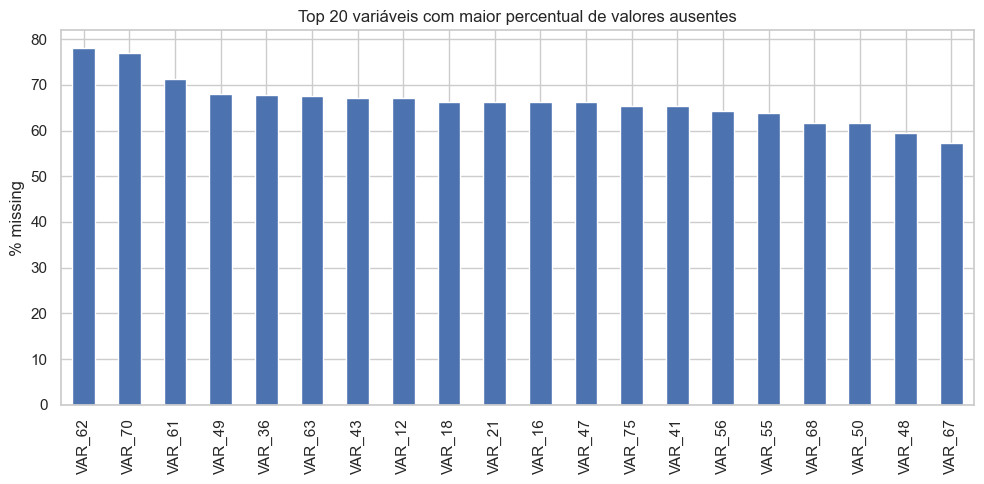

In [22]:
plt.figure(figsize=(10, 5))
summary_missing["pct_missing"].head(20).plot(kind="bar")
plt.ylabel("% missing")
plt.title("Top 20 variáveis com maior percentual de valores ausentes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 6. Divisão de treino e teste

In [ ]:
# Separando em treino e teste
df_train = df[df["safra"] <= 201409].copy()
df_test  = df[df["safra"] >  201409].copy()

df_train.shape, df_test.shape

((8211, 81), (2527, 81))

In [ ]:
# Verificando o default por base
df["y"].mean(), df_train["y"].mean(), df_test["y"].mean()

(np.float64(0.29130191842056247),
 np.float64(0.2820606503470954),
 np.float64(0.32132963988919666))

In [32]:
# Salvando bases
df_train.to_csv(r'C:\Users\Enrico\OneDrive\Documentos\Python\credit_scoring_challenge\data\processed\train.csv', index=False)
df_test.to_csv(r'C:\Users\Enrico\OneDrive\Documentos\Python\credit_scoring_challenge\data\processed\test.csv', index=False)